In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')


In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [6]:
# Reading the dataset
import pandas as pd
import numpy as np
ZomatoData=pd.read_csv('/content/drive/MyDrive/Datasets/Dataset .csv', encoding='latin')
print('Shape before deleting duplicate values:', ZomatoData.shape)

# Removing duplicate rows if any
ZomatoData=ZomatoData.drop_duplicates()
print('Shape After deleting duplicate values:', ZomatoData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
ZomatoData.head(10)


Shape before deleting duplicate values: (9551, 21)
Shape After deleting duplicate values: (9551, 21)


,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


# Defining the problem statement:
Create a Predictive model which can predict the future Rating of a restaurant<br>
Target Variable: Rating<br>
Predictors: location, menu, cost etc.<br>
Rating=1 Worst
Rating=5 Best

### we need to create a supervised ML Regression model, as the target variable is Continuous.

# Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.<br>
Bell curve is desirable but slightly positive skew or negative skew is also fine<br>
When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

### **Defining the problem statement:**
Create a Predictive model which can predict the future Rating of a restaurant<br>
Target Variable: Rating<br>
Predictors: location, menu, cost etc.<br>
Rating=1 Worst
Rating=5 Best

<Axes: >

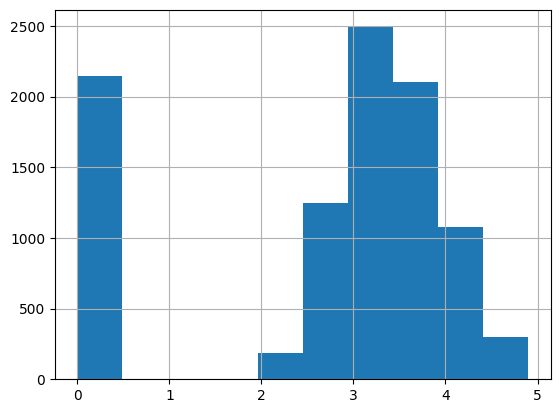

In [9]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
ZomatoData['Aggregate rating'].hist()

In [10]:
# Looking at sample rows in the data
ZomatoData.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿Restaurant ID      9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [12]:
# Looking at the descriptive statistics of the data
ZomatoData.describe(include='all')

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,...,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,...,12,2,2,2,1,NaN,NaN,6,6,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,...,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,Orange,Average,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,...,8652,8393,7100,9517,9551,NaN,NaN,3737,3737,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,...,NaN,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,NaN,156.909748
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,NaN,430.169145
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,NaN,5.000000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,NaN,31.000000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,NaN,131.000000


In [13]:
# Figuring unique values for each column
# To understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
ZomatoData.nunique()

ï»¿Restaurant ID        9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

The selected columns in this step are not final, further study will be done and then a final list will be created

**Restaurant ID**: Qualitative. Rejected.<br>
**Restaurant Name:** Qualitative. Rejected.<br>
**Country Code:** Categorical. Selected.<br>
**City:** Categorical. Rejected. Too many unique<br> levels, hence it will cause high dimensionality<br>
**Address:** Qualitative. Rejected.<br>
**Locality:** Qualitative. Rejected.<br>
**Locality Verbose:** Qualitative. Rejected.
**Longitude:** Continuous. Selected. This represents the location of restaurant<br>
**Latitude:** Continuous. Selected. This represents the location of restaurant<br>
**Cuisines**: Qualitative. Rejected. A new feature can be engineered from it.<br>
**Currency:** Categorical. Selected.<br>
**Has Table booking:** Categorical. Selected.<br>
**Has Online delivery:** Categorical. Selected.<br>
**Is delivering now:** Categorical. Selected.<br>
Switch to order menu:  Categorical. Selected.<br>
**Price range:** Categorical. Selected.<br>
Votes: Continuous. Selected.<br>
**Average Cost for two:** Continuous. Selected.<br>
Rating: Continuous. Selected. This is the **Target Variable!**

In this data the "Cuisines" column cannot be used directly because it will generate 1825 dummy variables!! Hence, we can count the number of cuisines offered, which can be a number, hence it can be used in ML.

In [14]:
# Function to count the number of cuisines
def cuisine_counter(inpStr):
    NumCuisines=len(str(inpStr).split(','))
    return(NumCuisines)

In [15]:
# Creating a new feature in data
# We will further explore the new feature just like other features
ZomatoData['CuisineCount']=ZomatoData['Cuisines'].apply(cuisine_counter)
ZomatoData.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,CuisineCount
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,2


## **Removing useless columns from the data**

In [17]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['ï»¿Restaurant ID', 'Restaurant Name','City','Address',
                  'Locality', 'Locality Verbose','Cuisines']
ZomatoData = ZomatoData.drop(UselessColumns,axis=1)
ZomatoData.head()

,Country Code,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,CuisineCount
0,162,121.027535,14.565443,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,3
1,162,121.014101,14.553708,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,1
2,162,121.056831,14.581404,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,4
3,162,121.056475,14.585318,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,2
4,162,121.057508,14.584450,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,2


### **Visualize distribution of all the Categorical Predictor variables in the data using bar plots**
**Categorical Predictors:** 'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','Price range'

In [18]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

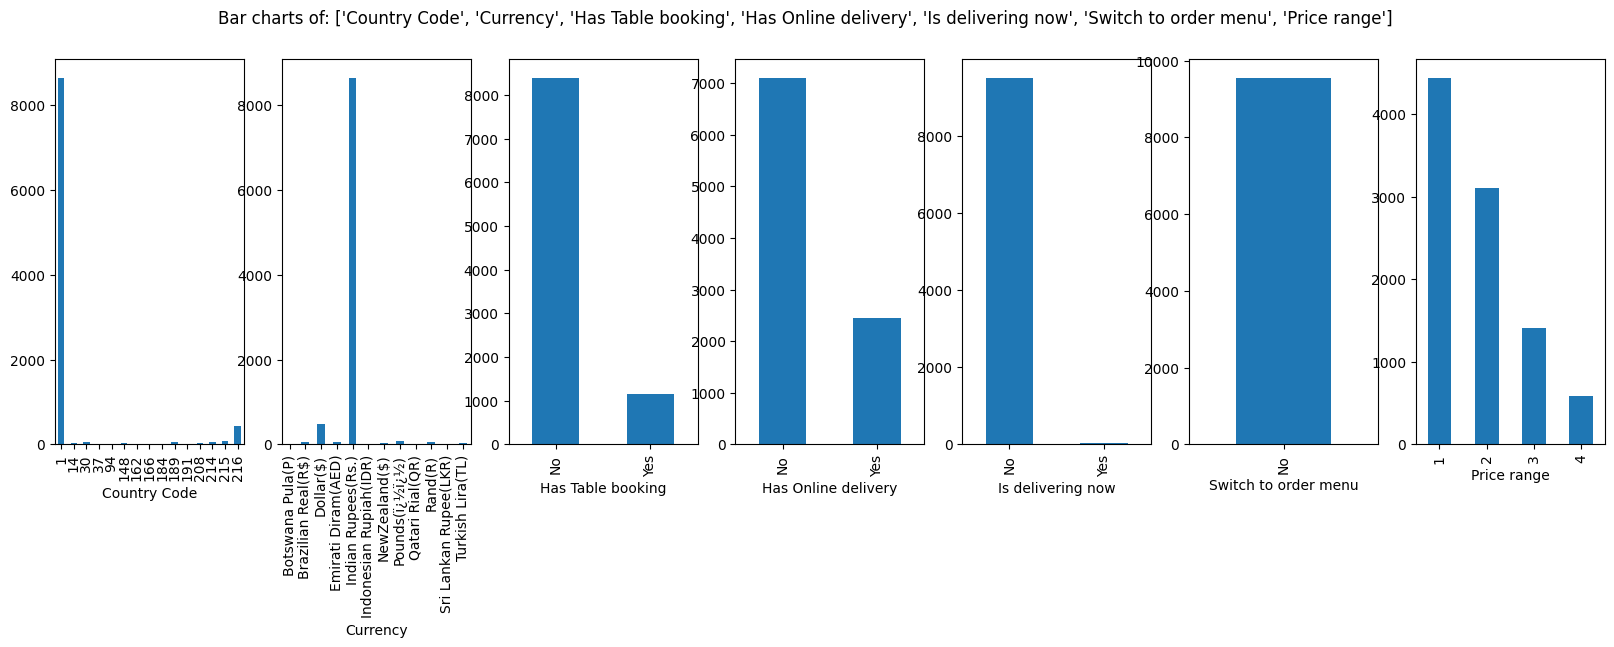

In [19]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=ZomatoData, colsToPlot=[
    'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now',
    'Switch to order menu','Price range'])

In this data, "Country Code", "Currency", "is delivering now" and "Switch to order menu" are too skewed. There is just one bar which is dominating and other categories have very less rows or there is just one value only. Such columns are not correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.

**Selected Categorical Variables:** Only three categorical variables are selected for further analysis.

'Has Table booking', 'Has Online delivery', 'Price range'

**Visualize distribution of all the Continuous Predictor variables in the data using histograms**

Based on the Basic Data Exploration, There are four continuous predictor variables ''Longitude', 'Latitude','Votes', and 'Average Cost for two'

array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average Cost for two'}>]], dtype=object)

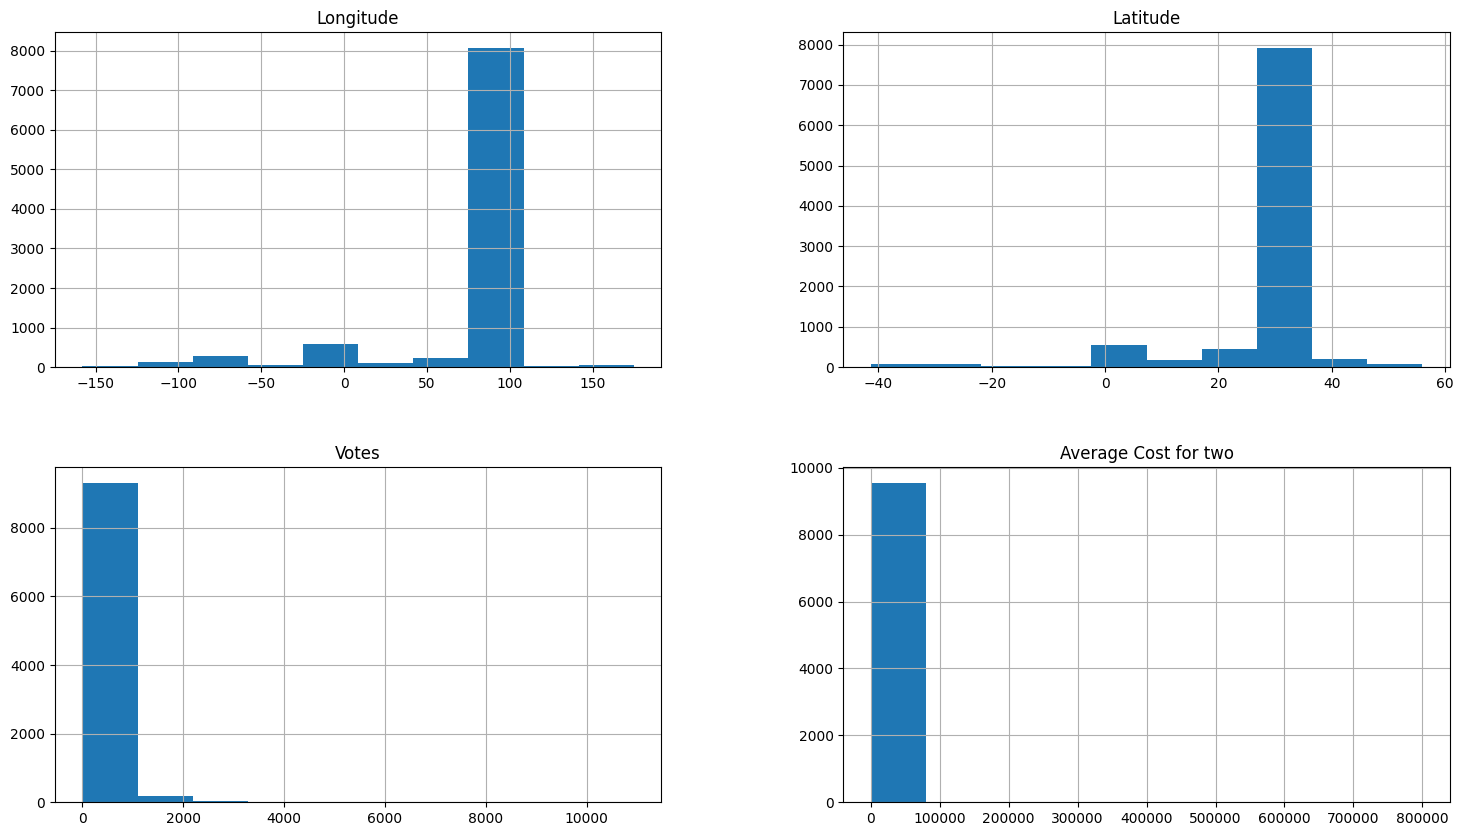

In [20]:
# Plotting histograms of multiple columns together
ZomatoData.hist(['Longitude', 'Latitude',
                 'Votes', 'Average Cost for two'], figsize=(18,10))

Selected Continuous Variables:

**Longitude :** Selected. The distribution is good.<br>
**Latitude:** Selected. The distribution is good.<br>
**Votes:** Selected. Outliers seen beyond 300000, need to treat them.<br>
**Average Cost for two:** Selected. Outliers seen beyond 4000, need to treat them.

## **Outlier treatment**
#### Replacing outliers for 'Votes'

In [21]:
# Finding nearest values to 4000 mark
ZomatoData['Votes'][ZomatoData['Votes']<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

Above result shows the nearest logical value is 3986, hence, replacing any value above 4000 with it.

In [22]:
# Replacing outliers with nearest possibe value
ZomatoData['Votes'][ZomatoData['Votes']>4000] =3986

### **Replacing outliers for 'Average Cost for two'**

In [23]:
# Finding nearest values to 50000 mark
ZomatoData['Average Cost for two'][ZomatoData['Average Cost for two']<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: Average Cost for two, Length: 9530, dtype: int64

Above result shows the nearest logical value is 8000, hence, replacing any value above 50000 with it.

In [24]:
# Replacing outliers with nearest possibe value
ZomatoData['Average Cost for two'][ZomatoData['Average Cost for two']>50000] =8000

**Visualizing distribution after outlier treatment**


array([[<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average Cost for two'}>]], dtype=object)

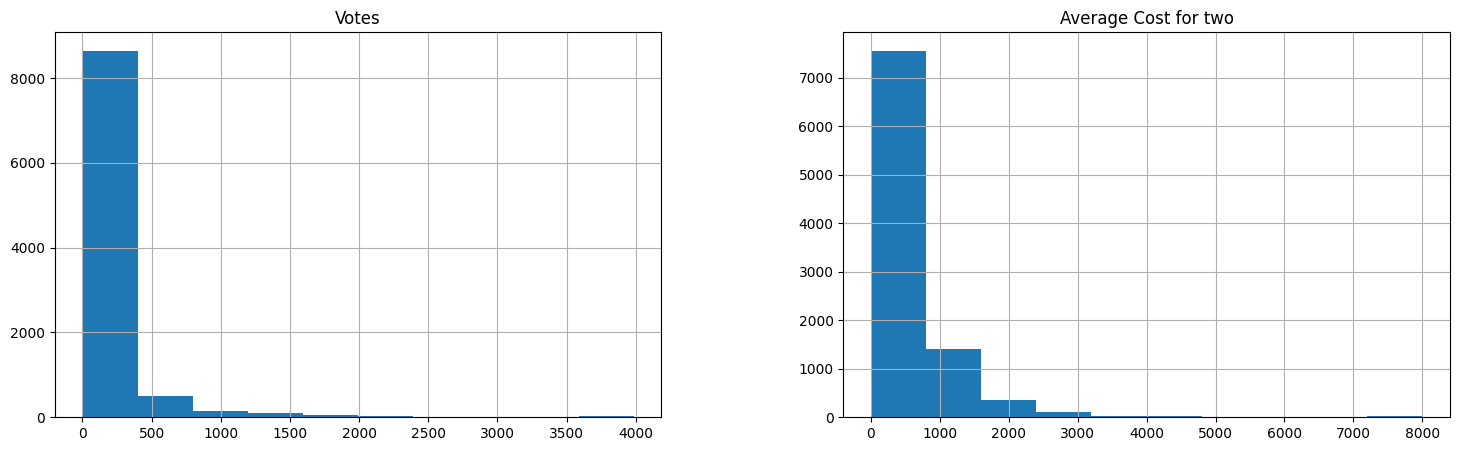

In [26]:
ZomatoData.hist(['Votes', 'Average Cost for two'], figsize=(18,5))

The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

**Missing values treatment**<br>
If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

In [27]:
# Finding how many missing values are there for each column
ZomatoData.isnull().sum()

Country Code            0
Longitude               0
Latitude                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
CuisineCount            0
dtype: int64

No missing values in this data!!

# **Feature Selection**
**Visual exploration of relationship between variables**<br>
Continuous Vs Continuous ---- Scatter Plot<br>
Categorical Vs Continuous---- Box Plot<br>
Categorical Vs Categorical---- Grouped Bar Plots<br>
**Statistical measurement of relationship strength between variables**<br>
Continuous Vs Continuous ---- Correlation matrix<br>
Categorical Vs Continuous---- ANOVA test<br>
Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present
<br>
Continuous Target Variable Vs Continuous Predictor<br>
Continuous Target Variable Vs Categorical Predictor

**Relationship exploration: Continuous Vs Continuous -- Scatter Charts**

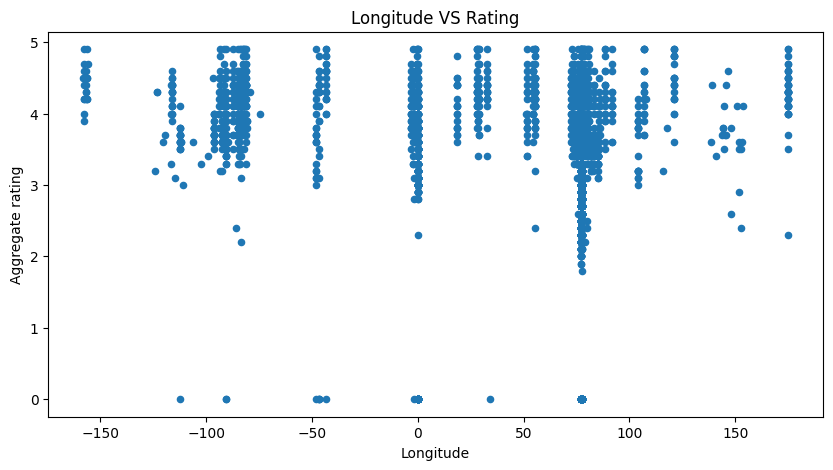

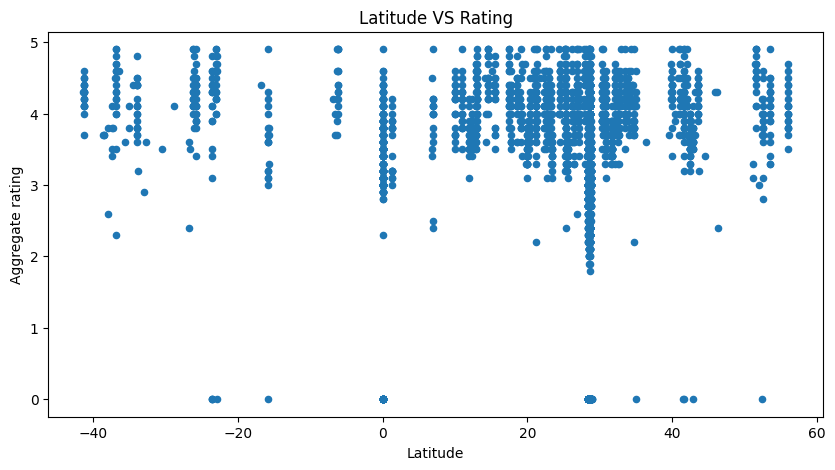

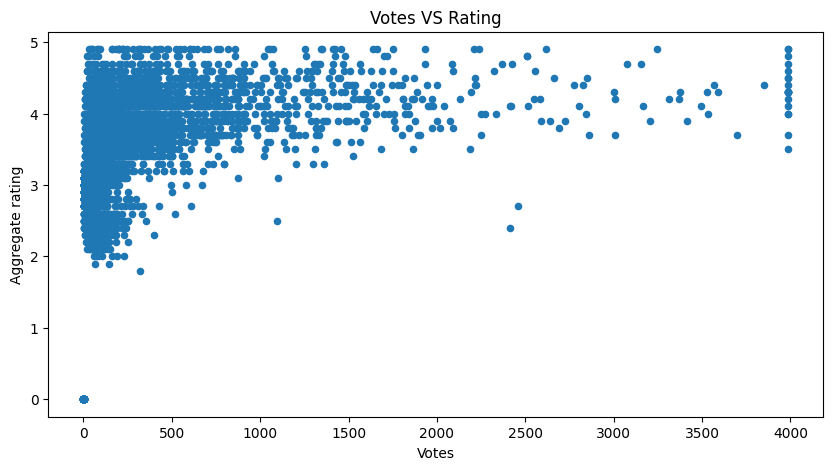

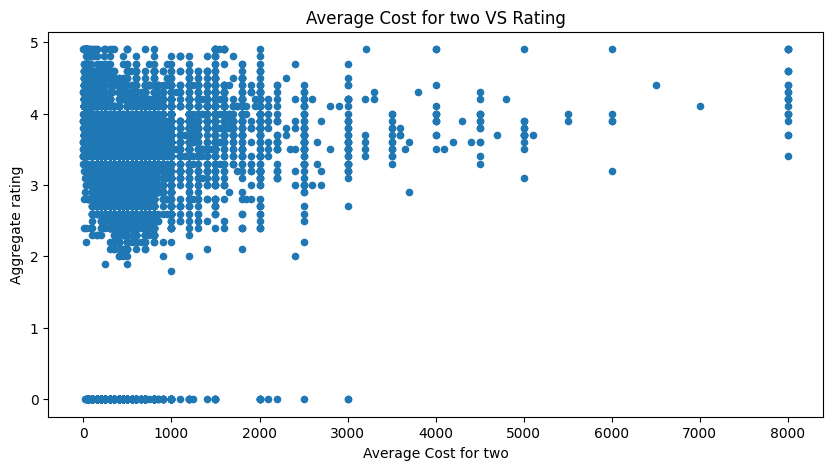

In [30]:
ContinuousCols=['Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    ZomatoData.plot.scatter(x=predictor, y='Aggregate rating', figsize=(10,5), title=predictor+" VS "+ 'Rating')

**Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**

In [31]:
# Calculating correlation matrix
ContinuousCols=['Aggregate rating','Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Creating the correlation matrix
CorrelationData=ZomatoData[ContinuousCols].corr()
CorrelationData

,Aggregate rating,Longitude,Latitude,Votes,Average Cost for two
Aggregate rating,1.000000,-0.116818,0.000516,0.346906,0.240494
Longitude,-0.116818,1.000000,0.043207,-0.101381,0.210272
Latitude,0.000516,0.043207,1.000000,-0.019687,-0.064748
Votes,0.346906,-0.101381,-0.019687,1.000000,0.245662
Average Cost for two,0.240494,0.210272,-0.064748,0.245662,1.000000


from matplotlib import pyplot as plt
CorrelationData['Aggregate rating'].plot(kind='hist', bins=20, title='Aggregate rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
CorrelationData['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
CorrelationData['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
CorrelationData['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
CorrelationData.plot(kind='scatter', x='Aggregate rating', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
CorrelationData.plot(kind='scatter', x='Longitude', y='Latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
CorrelationData.plot(kind='scatter', x='Latitude', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
CorrelationData.plot(kind='scatter', x='Votes', y='Average Cost for two', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
CorrelationData['Aggregate rating'].plot(kind='line', figsize=(8, 4), title='Aggregate rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
CorrelationData['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
CorrelationData['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
CorrelationData['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['Aggregate rating'].plot(kind='hist', bins=20, title='Aggregate rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Aggregate rating', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Longitude', y='Latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Latitude', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Votes', y='Average Cost for two', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Aggregate rating'].plot(kind='line', figsize=(8, 4), title='Aggregate rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Aggregate rating', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Longitude', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Latitude', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Votes', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [33]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['Aggregate rating'][abs(CorrelationData['Aggregate rating']) > 0.2 ]

Aggregate rating        1.000000
Votes                   0.346906
Average Cost for two    0.240494
Name: Aggregate rating, dtype: float64

**Final selected Continuous columns:**

'Votes', 'Average Cost for two'

**Relationship exploration: Categorical Vs Continuous -- Box Plots**

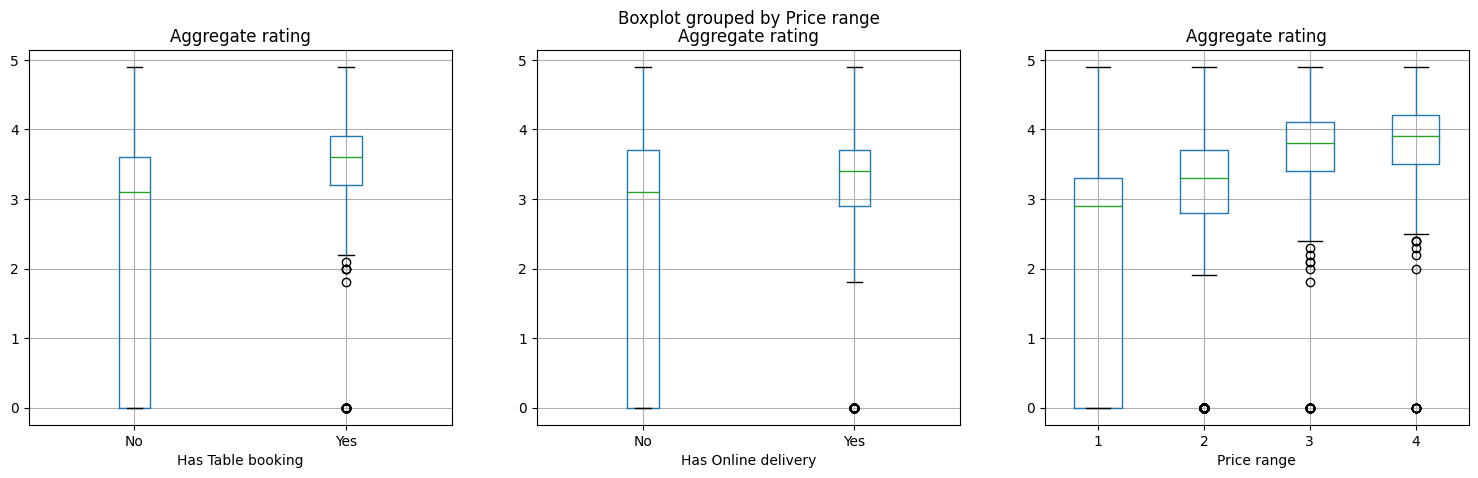

In [35]:
# Box plots for Categorical Target Variable "Rating" and continuous predictors
CategoricalColsList=['Has Table booking', 'Has Online delivery', 'Price range']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Rating"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    ZomatoData.boxplot(column='Aggregate rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])


**Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

In [36]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [38]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Has Table booking', 'Has Online delivery', 'Price range']
FunctionAnova(inpData=ZomatoData,
              TargetVariable='Aggregate rating',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Has Table booking is correlated with Aggregate rating | P-Value: 2.4808519133558066e-78
Has Online delivery is correlated with Aggregate rating | P-Value: 1.4004463504064177e-110
Price range is correlated with Aggregate rating | P-Value: 0.0


['Has Table booking', 'Has Online delivery', 'Price range']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

Final selected Categorical columns:

'Has Table booking', 'Has Online delivery', 'Price range'

**Selecting final predictors for Machine Learning**<br>
Based on the above tests, selecting the final columns for machine learning

In [39]:
SelectedColumns=['Votes','Average Cost for two','Has Table booking',
                 'Has Online delivery','Price range']

# Selecting final columns
DataForML=ZomatoData[SelectedColumns]
DataForML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4


from matplotlib import pyplot as plt
_df_17['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Average Cost for two'].plot(kind='hist', bins=20, title='Average Cost for two')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Price range'].plot(kind='hist', bins=20, title='Price range')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('Has Table booking').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Votes', y='Average Cost for two', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Average Cost for two', y='Price range', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Price range']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('Price range', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Has Table booking')):
  _plot_series(series, series_name, i)
  fig.legend(title='Has Table booking', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Price range')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Price range']
  ys = series['Average Cost for two']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Price range', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Has Table booking')):
  _plot_series(series, series_name, i)
  fig.legend(title='Has Table booking', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Price range')
_ = plt.ylabel('Average Cost for two')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Price range']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Price range'}, axis=1)
              .sort_values('Price range', ascending=True))
  xs = counted['Price range']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Price range', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Has Table booking')):
  _plot_series(series, series_name, i)
  fig.legend(title='Has Table booking', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Price range')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_26['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Average Cost for two'].plot(kind='line', figsize=(8, 4), title='Average Cost for two')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Price range'].plot(kind='line', figsize=(8, 4), title='Price range')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Has Table booking'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Votes', y='Has Table booking', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Has Table booking'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Average Cost for two', y='Has Table booking', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['Has Table booking'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='Price range', y='Has Table booking', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [41]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

**Data Pre-processing for Machine Learning**<br>
List of steps performed on predictor variables before data can be used for machine learning<br>

1. Converting each Ordinal Categorical columns to numeric<br>
2.Converting Binary nominal Categorical columns to numeric using 1/0 mapping<br>
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()<br>
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks<br>
In this data there is no Ordinal categorical variable.

**Converting the binary nominal variable to numeric using 1/0 mapping**

In [42]:
# Converting the binary nominal variable sex to numeric
DataForML['Has Table booking'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Has Online delivery'].replace({'Yes':1, 'No':0}, inplace=True)

**Converting the nominal variable to numeric using get_dummies()**

In [44]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Aggregate rating']=ZomatoData['Aggregate rating']

# Printing sample rows
DataForML_Numeric.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


**Machine Learning: Splitting the data into Training and Testing sample**<br>
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [45]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Votes', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating'],
      dtype='object')

In [46]:
# Separate Target Variable and Predictor Variables
TargetVariable='Aggregate rating'
Predictors=['Votes', 'Average Cost for two', 'Has Table booking',
           'Has Online delivery', 'Price range']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

#**Multiple Linear Regression**

In [49]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Aggregate rating']-TestingDataResults['PredictedAggregate rating']))/TestingDataResults['Aggregate rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.2730911238511675

##### Model Validation and Accuracy Calculations ##########
   Aggregate rating  PredictedAggregate rating
0               3.2                        3.0
1               3.2                        3.0
2               3.5                        2.0
3               4.1                        4.0
4               4.2                        3.0
Mean Accuracy on test data: -inf
Median Accuracy on test data: 71.42857142857143

Accuracy values for 10-fold Cross Validation:
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]

Final Average Accuracy of the model: -inf


# **Decision Trees**

DecisionTreeRegressor(max_depth=6)
R2 Value: 0.9495944197343972

##### Model Validation and Accuracy Calculations ##########
   Aggregate rating  PredictedAggregate rating
0               3.2                        3.0
1               3.2                        3.0
2               3.5                        3.0
3               4.1                        3.0
4               4.2                        3.0
Mean Accuracy on test data: 89.70712377523388
Median Accuracy on test data: nan

Accuracy values for 10-fold Cross Validation:
 [nan nan nan nan nan nan nan nan nan nan]

Final Average Accuracy of the model: nan


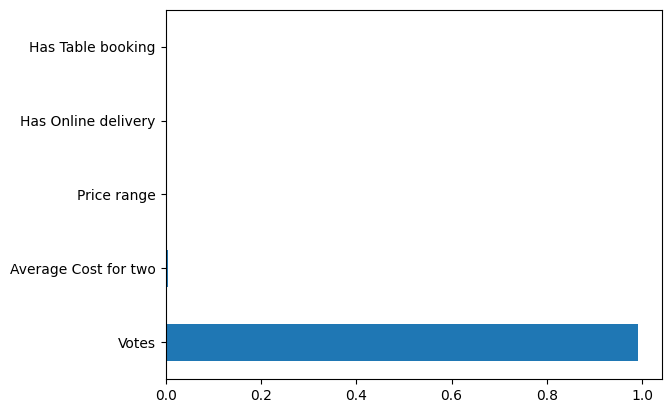

In [51]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='squared_error')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Aggregate rating']-TestingDataResults['PredictedAggregate rating']))/TestingDataResults['Aggregate rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

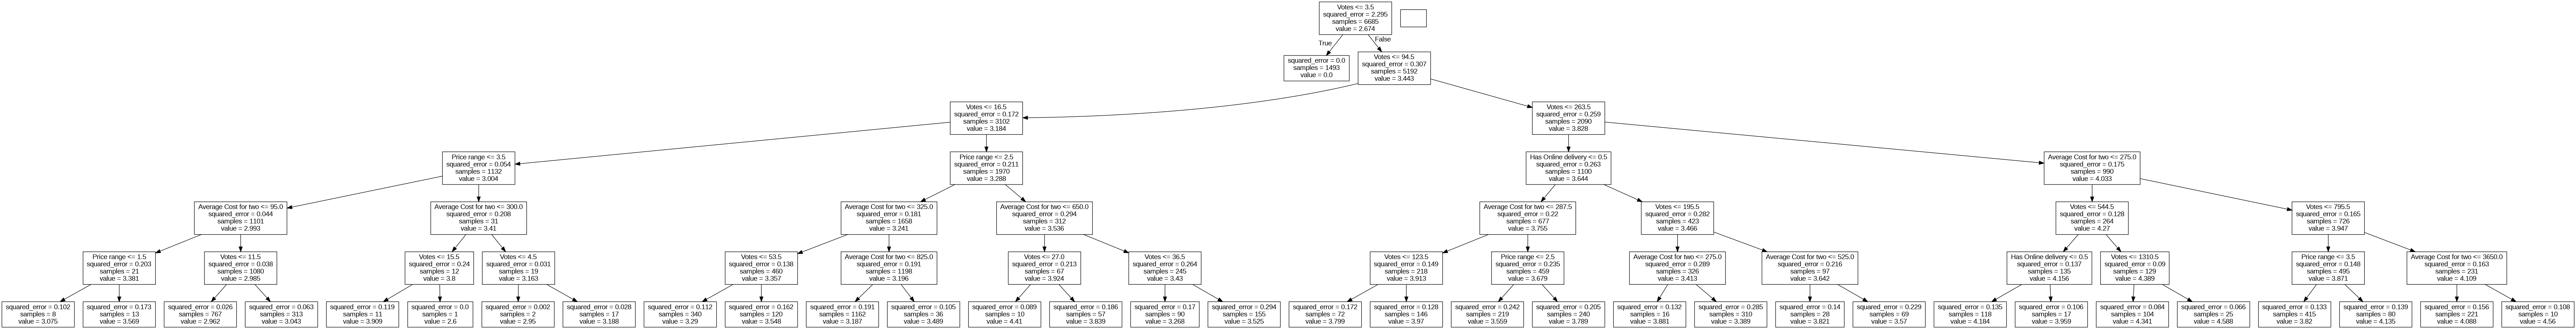

In [52]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=5000,height=5000)
# Double click on the graph to zoom in
